In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_regression

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import prep_plays
import wrangle_plays_data
plt.rcParams['figure.figsize']=(13,7)


plays = pd.read_csv('plays.csv')
players = pd.read_csv('players.csv')
week1 = pd.read_csv('week1.csv')
week2 = pd.read_csv('week2.csv')
week3 = pd.read_csv('week3.csv')
week4 = pd.read_csv('week4.csv')
week5 = pd.read_csv('week5.csv')
week6 = pd.read_csv('week6.csv')
week7 = pd.read_csv('week7.csv')
week8 = pd.read_csv('week8.csv')
week9 = pd.read_csv('week9.csv')
week10 = pd.read_csv('week10.csv')
week11 = pd.read_csv('week11.csv')
week12 = pd.read_csv('week12.csv')
week13 = pd.read_csv('week13.csv')
week14 = pd.read_csv('week14.csv')
week15 = pd.read_csv('week15.csv')
week16 = pd.read_csv('week16.csv')
week17 = pd.read_csv('week17.csv')
#plays = pd.read_csv('plays.csv')
#plays = pd.read_csv('plays.csv')

Acquire.py Loaded Successfully
Prep.py Loaded Successfully
Wrangle.py Loaded Successfully


In [2]:
week1.event.value_counts()

None                         908315
ball_snap                     15236
pass_forward                  14166
pass_arrived                  11456
pass_outcome_caught            8179
first_contact                  6866
tackle                         6792
pass_outcome_incomplete        5305
play_action                    2586
out_of_bounds                  1728
line_set                       1489
qb_sack                         788
man_in_motion                   547
pass_outcome_interception       485
touchdown                       366
pass_tipped                     280
fumble                          236
pass_outcome_touchdown          214
qb_strip_sack                   178
fumble_defense_recovered        176
fumble_offense_recovered        149
shift                           132
handoff                         101
penalty_flag                     61
pass_shovel                      60
run                              42
touchback                        30
qb_spike                    

In [3]:

def prep_week(df):

    df = df.dropna(axis = 0, how ='any')
    df.drop(df.index[df['event'] == 'None'], inplace = True)
    df.drop(df.index[df['event'] == 'ball_snap'], inplace = True)
    df.drop(df.index[df['event'] == 'pass_forward'], inplace = True)
    df.drop(df.index[df['event'] == 'pass_arrived'], inplace = True)
    df.drop(df.index[df['event'] == 'tackle'], inplace = True)
    df.drop(df.index[df['event'] == 'first_contact'], inplace = True)
    df.drop(df.index[df['event'] == 'play_action'], inplace = True)
    df.drop(df.index[df['event'] == 'out_of_bounds'], inplace = True)
    df.drop(df.index[df['event'] == 'line_set'], inplace = True)
    df.drop(df.index[df['event'] == 'man_in_motion'], inplace = True)
    df.drop(df.index[df['event'] == 'touchdown'], inplace = True)
    df.drop(df.index[df['event'] == 'pass_tipped'], inplace = True)
    df.drop(df.index[df['event'] == 'pass_outcome_touchdown'], inplace = True)
    df.drop(df.index[df['event'] == 'fumble'], inplace = True)
    df.drop(df.index[df['event'] == 'shift'], inplace = True)
    df.drop(df.index[df['event'] == 'fumble_defense_recovered'], inplace = True)
    df.drop(df.index[df['event'] == 'handoff'], inplace = True)
    df.drop(df.index[df['event'] == 'pass_shovel'], inplace = True)
    df.drop(df.index[df['event'] == 'penalty_flag'], inplace = True)
    df.drop(df.index[df['event'] == 'fumble_offense_recovered'], inplace = True)
    df.drop(df.index[df['event'] == 'touchback'], inplace = True)
    df.drop(df.index[df['event'] == 'penalty_accepted'], inplace = True)
    df.drop(df.index[df['event'] == 'field_goal_blocked'], inplace = True)
    df.drop(df.index[df['event'] == 'pass_lateral'], inplace = True)
    df.drop(df.index[df['event'] == 'lateral'], inplace = True)
    df.drop(df.index[df['event'] == 'snap_direct'], inplace = True)
    df.drop(df.index[df['event'] == 'run_pass_option'], inplace = True)
    df.drop(df.index[df['event'] == 'huddle_break_offense'], inplace = True)
    df.drop(df.index[df['event'] == 'huddle_start_offense'], inplace = True)
    df.drop(df.index[df['event'] == 'qb_strip_sack'], inplace = True)
    df.drop(df.index[df['event'] == 'timeout_home'], inplace = True)
    df.drop(df.index[df['event'] == 'qb_sack'], inplace = True)
    df['event'].replace({'pass_outcome_caught': 0,'pass_outcome_incomplete' : 1,'pass_outcome_interception' : 1}, inplace=True)
    #df['event'] = pd.to_numeric(df['event'])
    return df

In [7]:
week2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231793 entries, 0 to 1231792
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   time           1231793 non-null  object 
 1   x              1231793 non-null  float64
 2   y              1231793 non-null  float64
 3   s              1231793 non-null  float64
 4   a              1231766 non-null  float64
 5   dis            1231793 non-null  float64
 6   o              1147811 non-null  float64
 7   dir            1147811 non-null  float64
 8   event          1231793 non-null  object 
 9   nflId          1147811 non-null  float64
 10  displayName    1231793 non-null  object 
 11  jerseyNumber   1147811 non-null  float64
 12  position       1147811 non-null  object 
 13  frameId        1231793 non-null  int64  
 14  team           1231793 non-null  object 
 15  gameId         1231793 non-null  int64  
 16  playId         1231793 non-null  int64  
 17  playDire

In [8]:
week2.event.value_counts()

None                         1135827
ball_snap                      19020
pass_forward                   17545
pass_arrived                   15079
pass_outcome_caught            11461
tackle                          9018
first_contact                   6240
pass_outcome_incomplete         5249
play_action                     3356
out_of_bounds                   2528
line_set                        1201
qb_sack                         1008
man_in_motion                    581
touchdown                        522
shift                            511
pass_outcome_touchdown           497
pass_tipped                      385
pass_outcome_interception        363
fumble                           306
qb_strip_sack                    203
fumble_defense_recovered         172
qb_spike                         149
fumble_offense_recovered         145
handoff                          130
pass_shovel                      102
pass_lateral                      60
touchback                         30
r

In [9]:
#week2['event'] = pd.to_numeric(week2['event'])

#week2['event'] = week2.event.astype('int',errors='ignore')

In [10]:
week2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231793 entries, 0 to 1231792
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   time           1231793 non-null  object 
 1   x              1231793 non-null  float64
 2   y              1231793 non-null  float64
 3   s              1231793 non-null  float64
 4   a              1231766 non-null  float64
 5   dis            1231793 non-null  float64
 6   o              1147811 non-null  float64
 7   dir            1147811 non-null  float64
 8   event          1231793 non-null  object 
 9   nflId          1147811 non-null  float64
 10  displayName    1231793 non-null  object 
 11  jerseyNumber   1147811 non-null  float64
 12  position       1147811 non-null  object 
 13  frameId        1231793 non-null  int64  
 14  team           1231793 non-null  object 
 15  gameId         1231793 non-null  int64  
 16  playId         1231793 non-null  int64  
 17  playDire

In [11]:
week1 = prep_week(week1)
week2 = prep_week(week2)
week3 = prep_week(week3)
week4 = prep_week(week4)
week5 = prep_week(week5)
week6 = prep_week(week6)
week7 = prep_week(week7)
week8 = prep_week(week8)
week9 = prep_week(week9)
week10 = prep_week(week10)
week11 = prep_week(week11)
week12 = prep_week(week12)
week13 = prep_week(week13)
week14 = prep_week(week14)
week15 = prep_week(week15)
week16 = prep_week(week16)
week17 = prep_week(week17)

In [12]:
dfs = [week1,week2,week3,week4,week5,week6,week7,
      week8,week9,week10,week11,week12,week13,
      week14,week15,week16,week17]
weekdf = pd.concat(dfs)

In [35]:
weekdf.head(20)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
716,2018-09-07T01:07:19.700Z,81.48,50.13,4.93,3.07,0.49,326.77,358.86,0,2495454.0,Julio Jones,11.0,WR,52,away,2018090600,75,left,HITCH
718,2018-09-07T01:07:19.700Z,76.75,36.60,2.82,1.85,0.28,33.31,332.72,0,2533040.0,Mohamed Sanu,12.0,WR,52,away,2018090600,75,left,HITCH
724,2018-09-07T01:07:19.700Z,77.70,13.31,6.73,2.22,0.68,137.26,186.71,0,2555415.0,Austin Hooper,81.0,TE,52,away,2018090600,75,left,OUT
726,2018-09-07T01:07:19.700Z,86.28,8.01,5.34,3.77,0.55,71.65,202.39,0,2559033.0,Ricky Ortiz,30.0,FB,52,away,2018090600,75,left,FLAT
1487,2018-09-07T01:09:14.400Z,55.02,23.19,1.01,1.97,0.10,285.93,281.05,1,2543583.0,Devonta Freeman,24.0,RB,48,away,2018090600,146,left,FLAT
1489,2018-09-07T01:09:14.400Z,43.25,34.36,5.31,1.96,0.52,96.49,1.37,1,2552418.0,Justin Hardy,14.0,WR,48,away,2018090600,146,left,CROSS
1492,2018-09-07T01:09:14.400Z,43.62,49.96,1.18,4.92,0.14,200.32,328.01,1,2555415.0,Austin Hooper,81.0,TE,48,away,2018090600,146,left,FLAT
1494,2018-09-07T01:09:14.400Z,39.47,10.82,2.70,1.29,0.27,338.68,347.02,1,2557034.0,Marvin Hall,17.0,WR,48,away,2018090600,146,left,HITCH
1496,2018-09-07T01:09:14.400Z,47.25,37.10,1.93,2.46,0.16,160.91,94.14,1,2560854.0,Calvin Ridley,18.0,WR,48,away,2018090600,146,left,HITCH
2158,2018-09-07T01:09:55.200Z,40.89,40.88,3.60,1.18,0.36,235.78,213.57,1,2495454.0,Julio Jones,11.0,WR,47,away,2018090600,168,left,GO


# <div class="alert alert-block alert-info"> Week 1 info </div>

In [14]:
week1.info()#route.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 716 to 985674
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           4148 non-null   object 
 1   x              4148 non-null   float64
 2   y              4148 non-null   float64
 3   s              4148 non-null   float64
 4   a              4148 non-null   float64
 5   dis            4148 non-null   float64
 6   o              4148 non-null   float64
 7   dir            4148 non-null   float64
 8   event          4148 non-null   int64  
 9   nflId          4148 non-null   float64
 10  displayName    4148 non-null   object 
 11  jerseyNumber   4148 non-null   float64
 12  position       4148 non-null   object 
 13  frameId        4148 non-null   int64  
 14  team           4148 non-null   object 
 15  gameId         4148 non-null   int64  
 16  playId         4148 non-null   int64  
 17  playDirection  4148 non-null   object 
 18  rout

### Which route has the most incompletions?

,route,event
0,ANGLE,61
1,CORNER,55
2,CROSS,158
3,FLAT,196
4,GO,339
5,HITCH,241
6,IN,118
7,OUT,159
8,POST,122
9,SCREEN,47


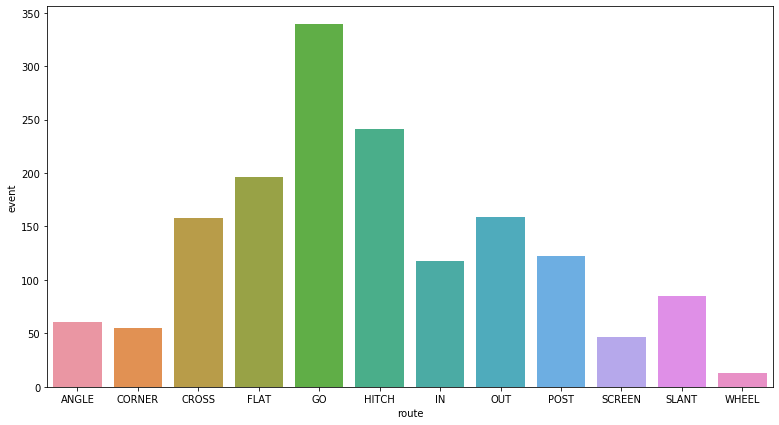

In [15]:
routead = week1.groupby('route')['event'].sum().reset_index()

sns.barplot(data=routead, x='route', y= 'event')

routead

### Listed positions and incompletions

,position,event
0,DL,0
1,FB,8
2,HB,6
3,RB,265
4,TE,362
5,WR,953


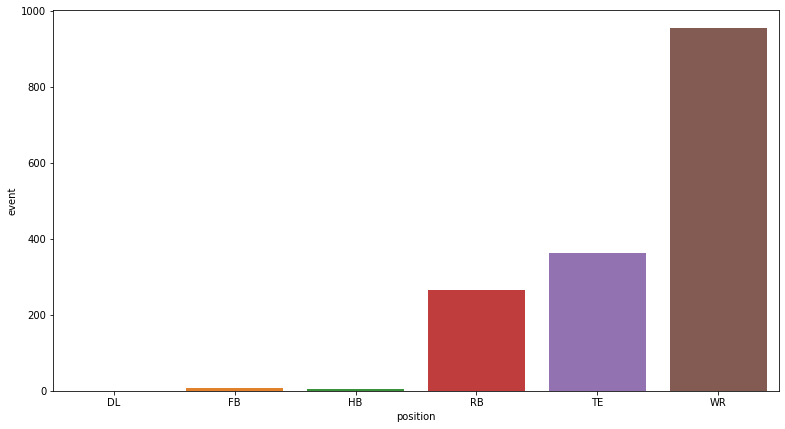

In [16]:
# DL was patrick ricard

positionad = week1.groupby('position')['event'].sum().reset_index()

sns.barplot(data=positionad, x='position', y= 'event')

positionad

In [17]:
week1[week1['position'] == 'DL']

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
87952,2018-09-09T17:04:55.900Z,57.92,12.69,7.36,1.96,0.74,105.06,138.24,0,2558990.0,Patrick Ricard,42.0,DL,40,home,2018090900,95,right,FLAT


### Does the home team have an advantage for completions?

,team,event
0,away,796
1,home,798


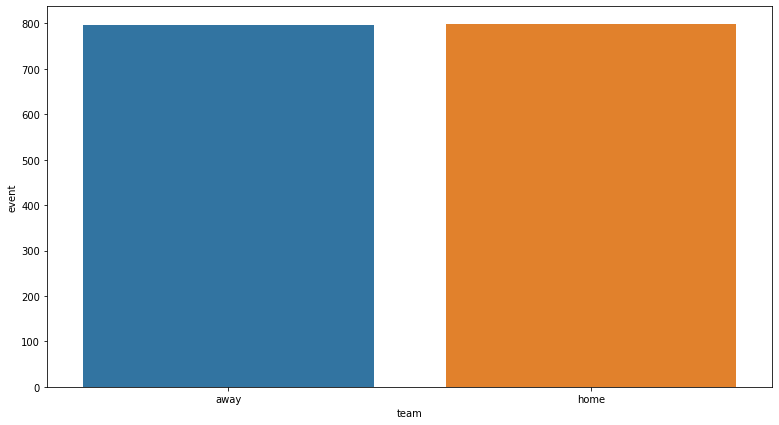

In [18]:
homead = week1.groupby('team')['event'].sum().reset_index()

sns.barplot(data=homead, x='team', y= 'event')

homead

### Top 20 player incompletions

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

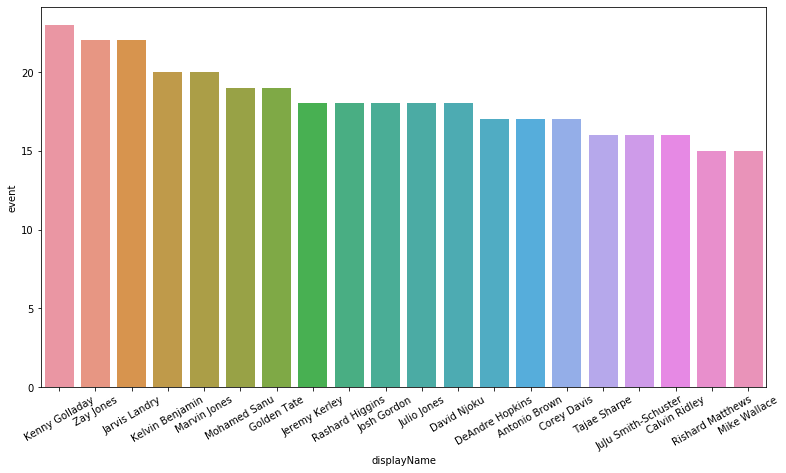

In [19]:
namead = week1.groupby('displayName')['event'].sum().reset_index()

namead20 = namead.sort_values(by='event', ascending=False).head(20)

sns.barplot(data=namead20, x='displayName', y= 'event')
plt.xticks(rotation=30)

# <div class="alert alert-block alert-info"> Weeks 1-17 info </div>

In [20]:
weekdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76351 entries, 716 to 1048577
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           76351 non-null  object 
 1   x              76351 non-null  float64
 2   y              76351 non-null  float64
 3   s              76351 non-null  float64
 4   a              76351 non-null  float64
 5   dis            76351 non-null  float64
 6   o              76351 non-null  float64
 7   dir            76351 non-null  float64
 8   event          76351 non-null  int64  
 9   nflId          76351 non-null  float64
 10  displayName    76351 non-null  object 
 11  jerseyNumber   76351 non-null  float64
 12  position       76351 non-null  object 
 13  frameId        76351 non-null  int64  
 14  team           76351 non-null  object 
 15  gameId         76351 non-null  int64  
 16  playId         76351 non-null  int64  
 17  playDirection  76351 non-null  object 
 18  ro

In [21]:
weekdf.event.value_counts()

0    49329
1    27022
Name: event, dtype: int64

### Week 1-17 Route Incompletions


,route,event
0,ANGLE,996
1,CORNER,1088
2,CROSS,2730
3,FLAT,3638
4,GO,5136
5,HITCH,4133
6,IN,2202
7,OUT,2915
8,POST,2034
9,SCREEN,690


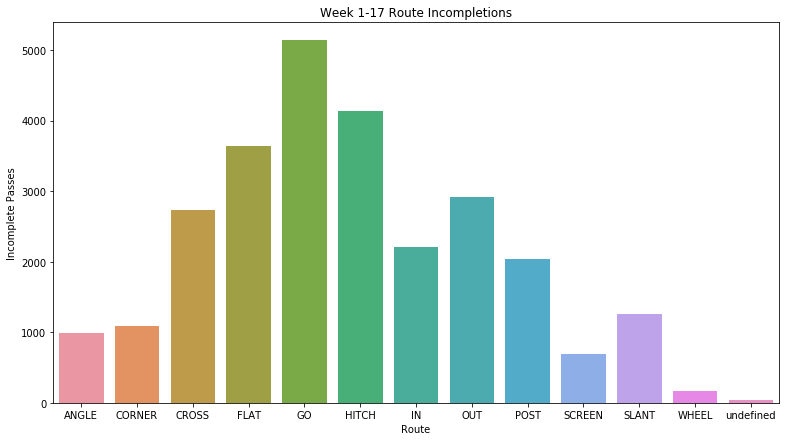

In [30]:
routedf = weekdf.groupby('route')['event'].sum().reset_index()

sns.barplot(data=routedf, x='route', y= 'event')
plt.title('Week 1-17 Route Incompletions')
plt.xlabel('Route')
plt.ylabel('Incomplete Passes')

routedf

### Week 1-17 Listed positions and incompletions

,position,event
0,CB,3
1,DE,1
2,DL,2
3,DT,0
4,FB,150
5,FS,1
6,HB,172
7,QB,21
8,RB,4483
9,TE,5838


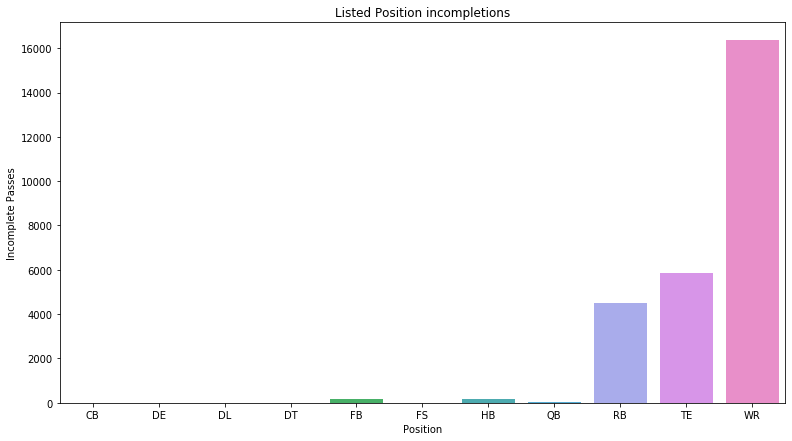

In [31]:
positiondf = weekdf.groupby('position')['event'].sum().reset_index()

sns.barplot(data=positiondf, x='position', y= 'event')
plt.title('Listed Position incompletions')
plt.xlabel('Position')
plt.ylabel('Incomplete Passes')

positiondf

### Does the home team have less incompletions?

,team,event
0,away,13595
1,home,13427


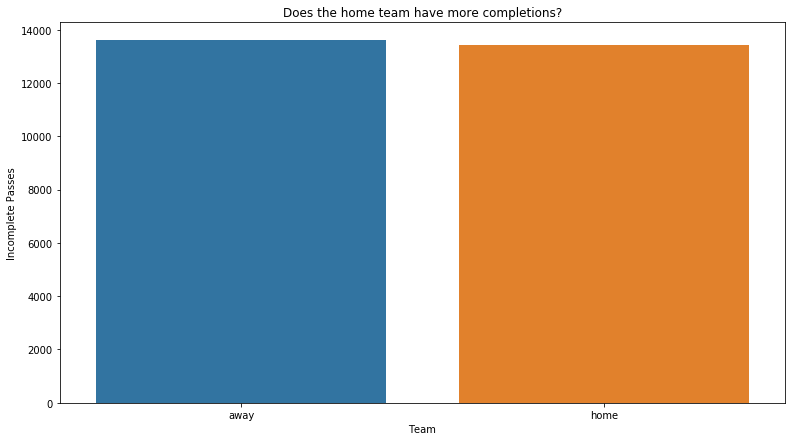

In [32]:
homedf = weekdf.groupby('team')['event'].sum().reset_index()

sns.barplot(data=homedf, x='team', y= 'event')
plt.title('Does the home team have more completions?')
plt.xlabel('Team')
plt.ylabel('Incomplete Passes')

homedf

### Top 20 player incompletions

Text(0, 0.5, 'Incomplete Passes')

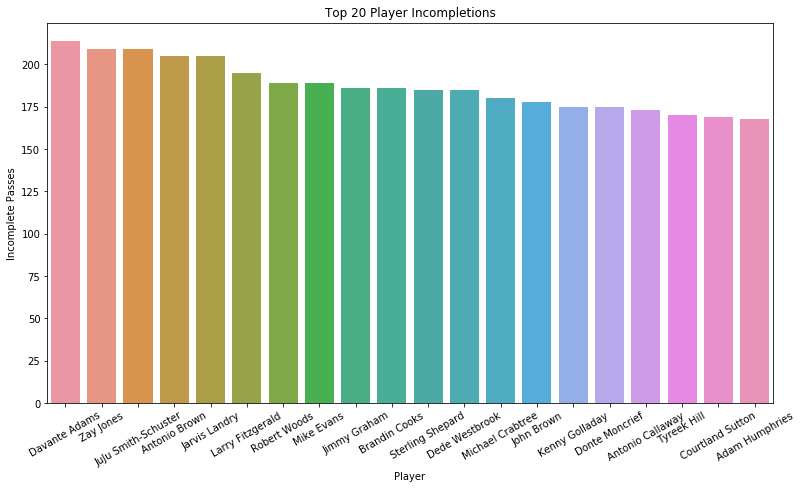

In [33]:
namedf = weekdf.groupby('displayName')['event'].sum().reset_index()

name20 = namedf.sort_values(by='event', ascending=False).head(20)

sns.barplot(data=name20, x='displayName', y= 'event')
plt.xticks(rotation=30)
plt.title('Top 20 Player Incompletions')
plt.xlabel('Player')
plt.ylabel('Incomplete Passes')